실습에 해당하는 내용은 책 "혼자 공부하는 머신러닝+딥러닝"을 참고해서 작성했습니다.

# Ensemble

In [ ]:
# 랜덤 포레스트
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
# return_train_score=True로 하여 훈련 세트에 대한 점수도 같이 반환(과대적합 파악에 용이)
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [ ]:
# 특성 중요도 출력
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [ ]:
# 자체적으로 모델을 평가하는 oob 점수 출력
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


In [ ]:
# 엑스트라 트리
# 랜덤포레스트와 유사하나 부트스트랩 샘플을 사용하지 않고 각 결정 트리를 만들 때 전체 훈련 세트를 사용함
# 노드를 분할할 때 가장 좋은 분할을 찾는 것이 아니라 무작위로 뿐할함
# 특성을 무작위로 분할한다면 성능이 낮아이지만 많은 트리를 앙상블 하기에 오버피팅을 막고 검증 세트의 점수를 높이는 효과가 있음
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [ ]:
# 특성 중요도 출력
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


In [ ]:
# 그레디언트 부스팅
# 깊이가 얕은 결정트리를 사용하기에 오버피팅에 강하고 높은 일반화 성능
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [ ]:
# 학습률을 증가시키고 트리의 개수를 늘리면 성능이 향상됨
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [ ]:
# 특성 중요도 출력
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


In [ ]:
# 그레디언트 부스팅의 속도와 성능을 개선한 히스토그램 기반 그레디언트 부스팅
# 입력 특성을 256개의 구간으로 나누어 노드를 분할할 때 최적의 분할을 빠르게 찾음
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [ ]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [ ]:
# 특성 중요도 출력
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [ ]:
hgb.score(test_input, test_target)

0.8723076923076923

In [ ]:
# XGBoost
# tree_method 매개변수를 'hist'로 지정하여 히스토그램 기반 그레디언트 부스팅 가용
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9555033709953124 0.8799326275264677


#과제

1. 하단 셀에서 lightGBM 구현하기 (상단 Ensemble 셀 모두 실행 후 진행)
2. 그리드 서치, 랜덤 서치 각각 어떤 상황에서 효율적인지 설명
3. 다른 데이터셋으로 Decision Tree regression task 진행해보기
  - 원하는 데이터셋을 사용해도 괜찮고, 올려둔 bike_data 사용해도 괜찮음
  - 직접 구현해보는 것이 어렵다면 'bike sharing data decision tree regressor' 키워드로 검색 후 참고


## 과제1

In [ ]:
# 과제 1: lightGBM 구현하기
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(tree_method='hist', random_state=42)
scores = cross_validate(lgbm, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884


##과제2
답:그리드 서치는 가능한 모든 조합을 탐색하기에, 하이퍼파라미터의 공간이 큰 경우에는 시간이 오래걸려 비효율적일 수 있다. 공간이 큰 경우에는 랜덤서치를 활용하는 것이 효율적일수 있다.

## 과제3

In [ ]:
from google.colab import drive
drive.mount('/content/drive/Mydrive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# data manuipulation
import numpy as np
import pandas as pd

# modeling utilities
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split


# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
hour_df = pd.read_csv("./hour.csv")

In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
#칼럼명 변경
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)


#datetime 타입 변환
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

#범주형 변수 변횐
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

In [ ]:
#FE

def fit_transform_ohe(df,col_name):

    #라벨 인코딩
    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels
    #원핫 인코딩
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    return le,ohe,features_df


def transform_ohe(df,le,ohe,col_name):
    #라벨 인코딩
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels

    #라벨 인코딩
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)

    return features_df

In [ ]:
#훈련세트와 테스트세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(hour_df.iloc[:,0:-3],
                                        hour_df.iloc[:,-1],
                                        test_size=0.33,
                                        random_state=42)
X_train.reset_index(inplace=True)
y_train = y_train.reset_index()

X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

In [ ]:
cat_attr_list = ['season','is_holiday',
                 'weather_condition','is_workingday',
                 'hour','weekday','month','year']
numeric_feature_cols = ['temp','humidity','windspeed',
                        'hour','weekday','month','year']
subset_cat_features =  ['season','is_holiday','weather_condition','is_workingday']


#훈련데이터 세트 범주형 자료로 인코딩
encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X_train,col)
    encoded_attr_list.append({'label_enc':return_obj[0],
                              'ohe_enc':return_obj[1],
                              'feature_df':return_obj[2],
                              'col_name':col})


feature_df_list  = [X_train[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] \
                        for enc in encoded_attr_list \
                        if enc['col_name'] in subset_cat_features])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Train dataset shape::{}".format(train_df_new.shape))
print(train_df_new.head())

#테스트 세트 범주형 자료로 인코딩
test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df':transform_ohe(X_test,
                                                              le,ohe,
                                                              col_name),
                                   'col_name':col_name})


test_feature_df_list = [X_test[numeric_feature_cols]]
test_feature_df_list.extend([enc['feature_df'] \
                             for enc in test_encoded_attr_list \
                             if enc['col_name'] in subset_cat_features])

test_df_new = pd.concat(test_feature_df_list, axis=1)
print("Test dataset shape::{}".format(test_df_new.shape))
print(test_df_new.head())

Train dataset shape::(11643, 19)
   temp  humidity  windspeed hour weekday month year  season_1  season_2  \
0  0.64      0.65     0.1940    0       5     9    0       0.0       0.0   
1  0.50      0.45     0.2239   13       2     3    0       0.0       1.0   
2  0.86      0.47     0.5224   12       0     8    1       0.0       0.0   
3  0.30      0.61     0.0000    2       3     2    1       1.0       0.0   
4  0.54      0.19     0.4179   17       6     4    1       0.0       1.0   

   season_3  season_4  is_holiday_0  is_holiday_1  weather_condition_1  \
0       1.0       0.0           1.0           0.0                  1.0   
1       0.0       0.0           1.0           0.0                  1.0   
2       1.0       0.0           1.0           0.0                  1.0   
3       0.0       0.0           1.0           0.0                  1.0   
4       0.0       0.0           1.0           0.0                  1.0   

   weather_condition_2  weather_condition_3  weather_condition_4 

In [ ]:
X_train = train_df_new
y_train = y_train.total_count.values.reshape(-1,1)

X_test = test_df_new
y_test = y_test.total_count.values.reshape(-1,1)
print(X_train.shape,y_train.shape)

(11643, 19) (11643, 1)


In [ ]:
dtm = DecisionTreeRegressor(max_depth=6,
                           min_samples_split=8,
                           max_leaf_nodes=10)

dtm.fit(X_train,y_train)
print("R-Squared on train dataset={}".format(dtm.score(X_test,y_test)))

dtm.fit(X_test,y_test)
print("R-Squaredon test dataset={}".format(dtm.score(X_test,y_test)))

R-Squared on train dataset=0.603722650544531
R-Squaredon test dataset=0.6085309306528219


In [ ]:
param_grid = {"criterion": ["squared_error", "friedman_mse"],
              "min_samples_split": [10, 25, 40],
              "max_depth": [2, 5, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5, error_score='raise')

grid_cv_dtm.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=DecisionTreeRegressor(max_depth=6, max_leaf_nodes=10,
                                             min_samples_split=8),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [2, 5, 8], 'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 25, 40]})

In [ ]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.8320445160718
Best Hyperparameters::
{'criterion': 'squared_error', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [ ]:
df = pd.DataFrame(data=grid_cv_dtm.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014206,0.001252,0.003226,0.000176,squared_error,2,5,20,10,"{'criterion': 'squared_error', 'max_depth': 2,...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,109
1,0.013270,0.000071,0.003032,0.000142,squared_error,2,5,20,25,"{'criterion': 'squared_error', 'max_depth': 2,...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,109
2,0.015393,0.003719,0.003387,0.000392,squared_error,2,5,20,40,"{'criterion': 'squared_error', 'max_depth': 2,...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,109
3,0.015771,0.002290,0.003315,0.000180,squared_error,2,5,40,10,"{'criterion': 'squared_error', 'max_depth': 2,...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,109
4,0.014107,0.000795,0.003305,0.000288,squared_error,2,5,40,25,"{'criterion': 'squared_error', 'max_depth': 2,...",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,109


[Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')]

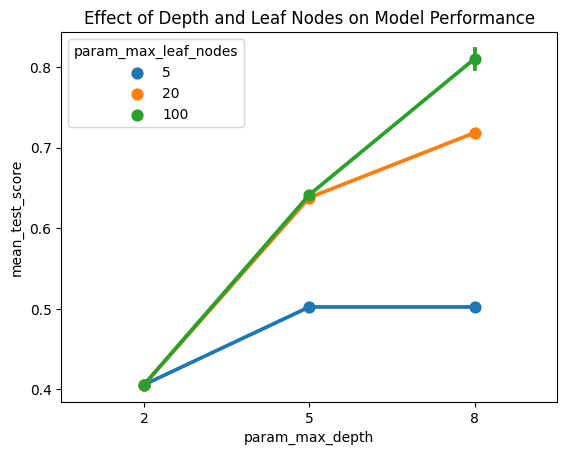

In [ ]:
fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

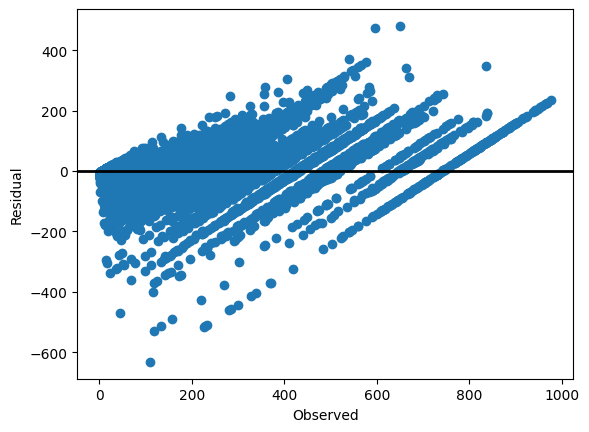

In [ ]:
#훈련모델평가
predicted = grid_cv_dtm.best_estimator_.predict(X_train)
residuals = y_train.flatten()-predicted

fig, ax = plt.subplots()
ax.scatter(y_train.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [ ]:
r2_scores = cross_val_score(grid_cv_dtm.best_estimator_, X_train, y_train, cv=10)
mse_scores = cross_val_score(grid_cv_dtm.best_estimator_, X_train, y_train, cv=10,scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))

avg R-squared::0.836
MSE::-5466.263


In [ ]:
best_dtm_model = grid_cv_dtm.best_estimator_

y_pred = best_dtm_model.predict(X_test)
residuals = y_test.flatten() - y_pred


r2_score = best_dtm_model.score(X_test,y_test)
print("R-squared:{:.3f}".format(r2_score))
print("MSE: %.2f" % metrics.mean_squared_error(y_test, y_pred))

R-squared:0.846
MSE: 4897.24
